# Refined upper bounds on the size of the condensed neighbourhood of sequences
Cedric Chauve, Marni Mishna, France Paquet-Nadeau
May 7, 2021.

#### Abstract
This notebook contains the code to generate the figures in the paper "Refined upper bounds on the size of the condensed neighbourhood of sequences" submitted to <a href="http://www.stringology.org/event/">PSC 2021</a>.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

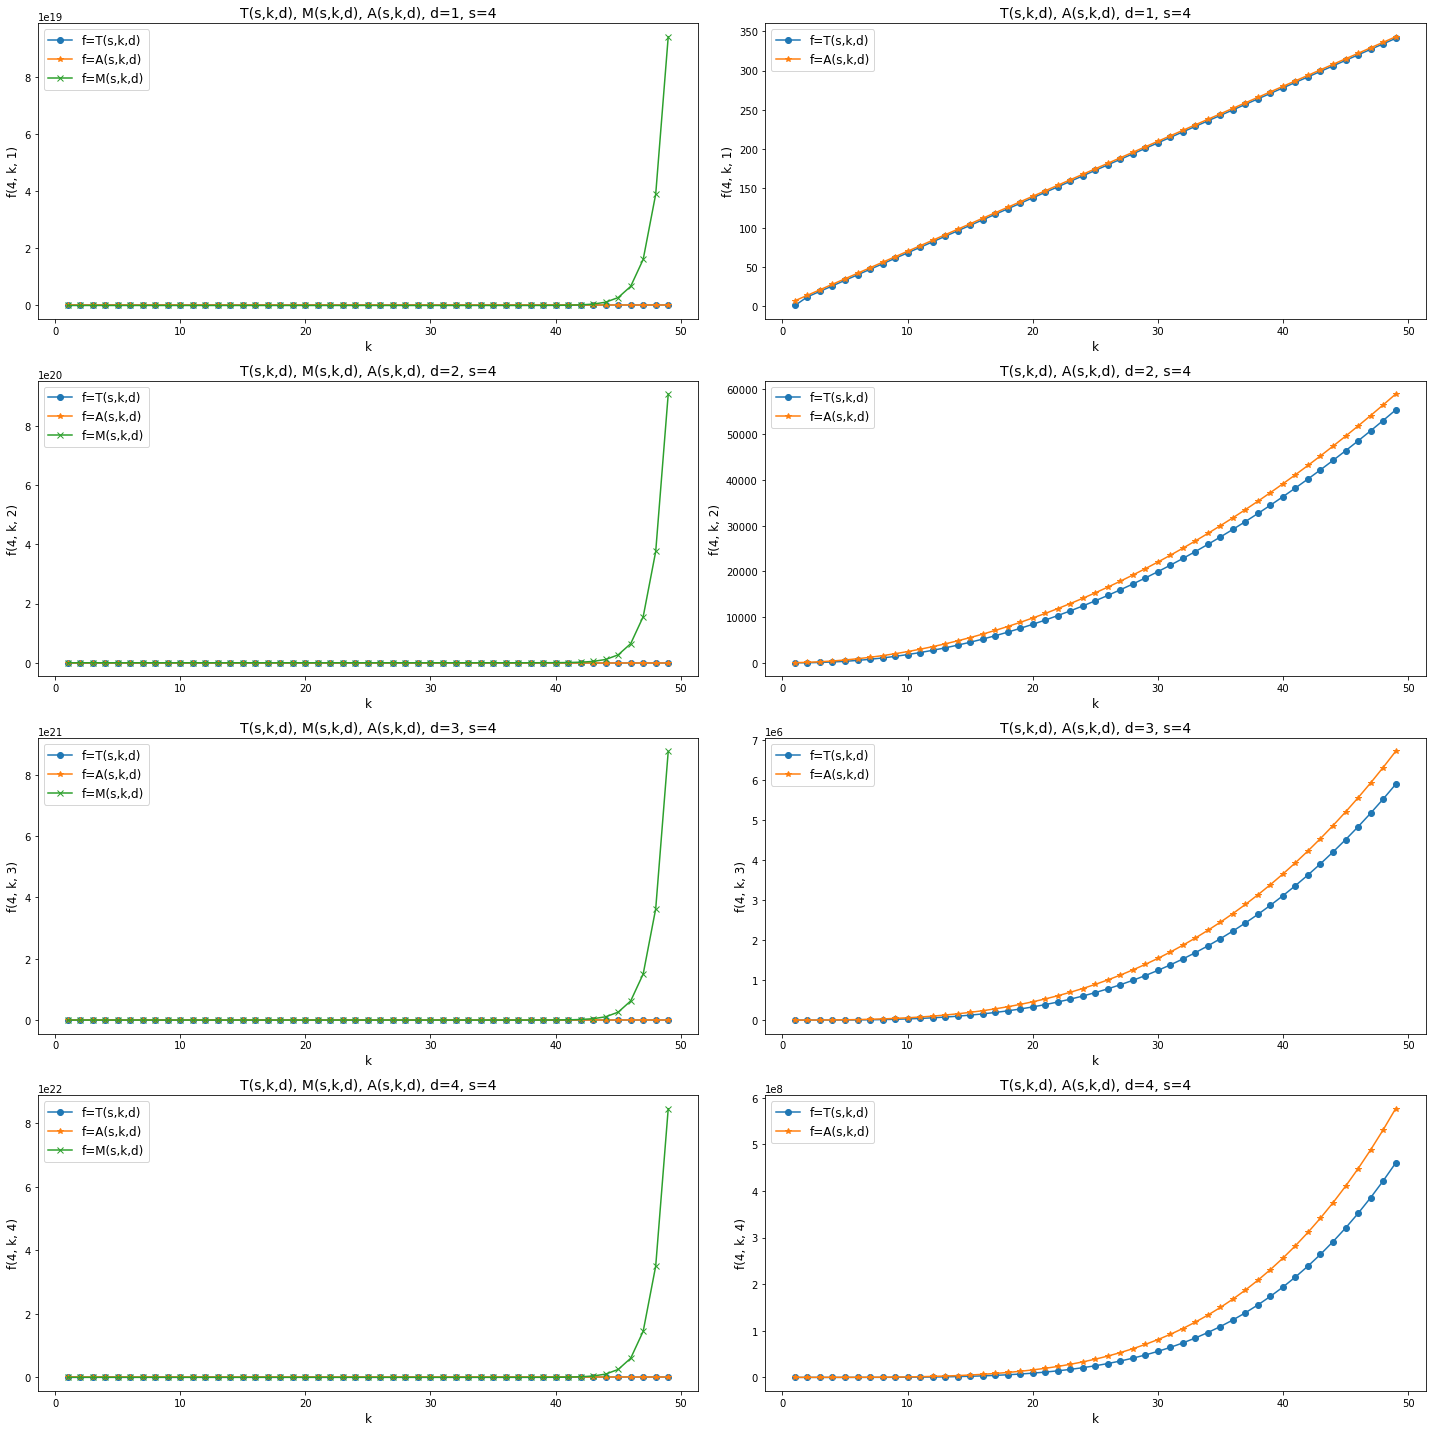

In [2]:
## Figure 1

def S_term1(s, k, d): # term (s-1)((s^j)S(s,k-2,d-1-j)) for j from 0 to d-1
    return (s-1)*sum([(s**j)*S_all(s,k-2,d-1-j) for j in range(0,d)])

def S_term2(s, k, d): # term (s-1)^2 *((s^j)S(s,k-2,d-2-j)) for j from 0 to d-2
    return (((s-1)**2))*sum([(s**j)*S_all(s,k-2,d-2-j) for j in range(0,d-1)])

def S_term3(s, k, d): # S(s,k-2-j,d-1-j) for j from 0 to d-1
    return sum([S_all(s,k-2-j,d-1-j) for j in range(0,d)])

def S_all(s, k, d):
    if k<=d or d==0:
        return 1
    else:
        return S_all(s,k-1,d)+(s-1)*S_all(s,k-1,d-1)+S_term1(s,k,d)+S_term2(s,k,d)+S_term3(s,k,d)
    
def S_term4(s, k, d): # (s^j)S(s,k-1,d-j) for j from 1 to d
    return sum([(s**j)*S_all(k-1,d-j,s) for j in range(1,d+1)])

def T(s, k, d):
    if k<=d or d==0:
        return 1
    else:
        return S_all(s,k,d)+S_term4(s,k,d)
    
def Myers_upperbound(s, k, d):
    c = 1+math.sqrt(2)
    c1 = (c+1)/(c-1)
    B = (c1**k)*(c**d)*(s**d)
    return (c/(c-1))*B

def improved_upperbound(s,k,d):
    return ((2*s-1)**d)*(k**d)/math.factorial(d)

S, K_MAX, D_MAX = 4, 50, 4
K_RANGE = range(1, K_MAX)
# D_RANGE = range(1, D_MAX+1)
D_RANGE
YS, YM, YI = {}, {}, {}

for d in D_RANGE:
    YS[d] = [T(S,k,d) for k in K_RANGE]
    YM[d] = [Myers_upperbound(S,k,d) for k in K_RANGE]
    YI[d] = [improved_upperbound(S,k,d) for k in K_RANGE]
    
fig, axes = plt.subplots(nrows=len(D_RANGE), ncols=2, figsize=(20, 20))
for d in D_RANGE:
    axes[d-1,0].plot(K_RANGE, YS[d], 'o-', label='f=T(s,k,d)')
    axes[d-1,0].plot(K_RANGE, YI[d], '*-', label='f=A(s,k,d)')
    axes[d-1,0].plot(K_RANGE, YM[d], 'x-', label='f=M(s,k,d)')
    axes[d-1,0].legend(fontsize=12)
    axes[d-1,0].set_title(f"T(s,k,d), M(s,k,d), A(s,k,d), d={d}, s=4", fontsize=14)
    axes[d-1,0].set_ylabel(f"f({S}, k, {d})", fontsize=12)
    axes[d-1,0].set_xlabel('k', fontsize=12)
    axes[d-1,1].plot(K_RANGE, YS[d], 'o-', label='f=T(s,k,d)')
    axes[d-1,1].plot(K_RANGE, YI[d], '*-', label='f=A(s,k,d)')
    axes[d-1,1].legend(fontsize=12)
    axes[d-1,1].set_title(f"T(s,k,d), A(s,k,d), d={d}, s=4", fontsize=14)
    axes[d-1,1].set_ylabel(f"f({S}, k, {d})", fontsize=12)
    axes[d-1,1].set_xlabel('k', fontsize=12)
fig.tight_layout()
plt.savefig('psc_2021_fig1.png')
plt.show()

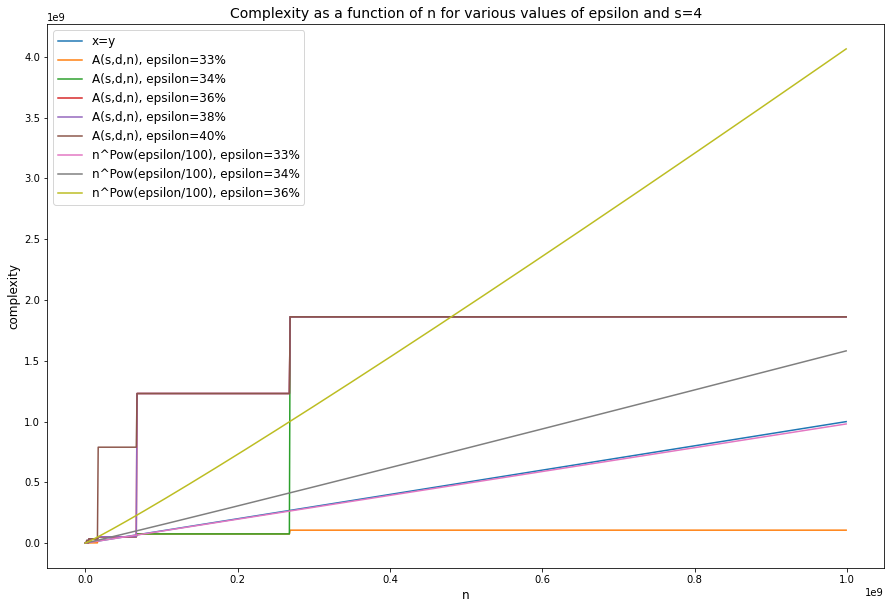

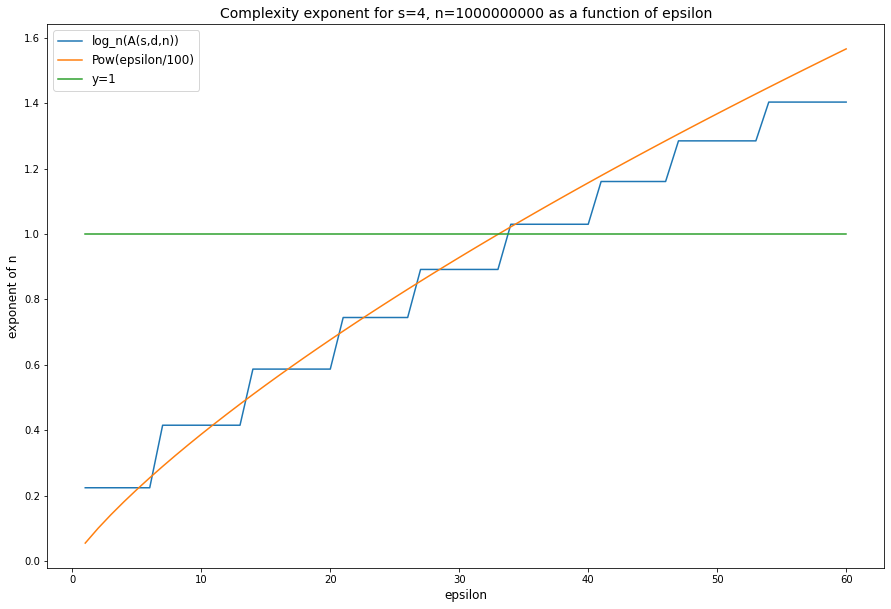

In [3]:
# Figure 2
# Expected time complexity as a function of n

# From the improved upper bound
def A_skd_ceil(n,s,eps):
    k = math.ceil(math.log(n,s))
    d = math.ceil(k*eps)
    t1 = ((2*s-1)**d)
    t2 = (k**d)
    t3 = int(math.factorial(d))
    return t1*t2/t3

# From Myers upper bound
def M_pow_n(n,s,eps):
    c = 1/eps + math.sqrt(1+1/(eps**2))
    t1 = math.log((c+1)/(c-1),s)
    t2 = eps*math.log(c,s)
    t3 = eps
    return (n**(t1+t2+t3))

# We fix a few values of epsilon and explore the behaviour as a function of n
N_MAX = 1000000000
N_STEP = int(N_MAX/1000)
N_RANGE = range(1,N_MAX,N_STEP)
EPS_RANGE = [e for e in range(1,61)]
POW_4,IMPROVED_4 = {}, {}
for eps in EPS_RANGE:
    POW_4[eps] = [M_pow_n(n,4,eps/100.0) for n in N_RANGE]
    IMPROVED_4[eps] = [A_skd_ceil(n,4,eps/100.0) for n in N_RANGE]
    
plt.figure(figsize=(15,10))
plt.plot(N_RANGE, N_RANGE, '-', label='x=y')
for eps in [33,34,36,38,40]:
    plt.plot(N_RANGE, IMPROVED_4[eps], '-', label=f"A(s,d,n), epsilon={eps}%")
for eps in [33,34,36]:
    plt.plot(N_RANGE, POW_4[eps], '-', label=f"n^Pow(epsilon/100), epsilon={eps}%")
plt.legend(fontsize=12)
plt.title('Complexity as a function of n for various values of epsilon and s=4', fontsize=14)
plt.ylabel('complexity', fontsize=12)
plt.xlabel('n', fontsize=12)
plt.savefig('psc_2021_fig2a.png')
plt.show()

# We fix n=10^9 and explore the behaviour of the complexity using both upper bounds
# for various values of epsilon
N_VAL = N_MAX
IMPROVED_E_LOG_4 = [math.log(A_skd_ceil(N_VAL,4,eps/100.0),N_VAL) for eps in EPS_RANGE]
POW_E_LOG_4 = [math.log(M_pow_n(N_VAL,4,eps/100.0),N_VAL) for eps in EPS_RANGE]
plt.figure(figsize=(15,10))
plt.plot(EPS_RANGE[0:60], IMPROVED_E_LOG_4[0:60], '-', label='log_n(A(s,d,n))')
plt.plot(EPS_RANGE[0:60], POW_E_LOG_4[0:60], '-', label='Pow(epsilon/100)')
plt.plot(EPS_RANGE[0:60], [1 for eps in range(0,60)], '-',label='y=1')
plt.legend(fontsize=12)
plt.title(f"Complexity exponent for s=4, n={N_VAL} as a function of epsilon", fontsize=14)
plt.ylabel('exponent of n', fontsize=12)
plt.xlabel('epsilon', fontsize=12)
plt.savefig('psc_2021_fig2b.png')
plt.show()